# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler # for stardardizing the data to the normal scale
from sklearn.model_selection import train_test_split # for splitting data into train and test
from sklearn.tree import DecisionTreeClassifier # Decision Tree model classifier
from sklearn.ensemble import RandomForestClassifier # RandomForest model classification
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import classification_report,confusion_matrix # classification report purposes


import warnings
warnings.filterwarnings("ignore")

# Dataset Feature names

In [2]:
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate", "class", 'difficulty level'])

# Loading KDDTrain+ data

In [3]:
train_df = pd.read_csv("KDDTrain+.txt", names = col_names)
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


# Basic information about train_df along with its datatype

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

# Checking missing data in train_df DataFrame

In [5]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# Load Test Data set

In [6]:
test_df = pd.read_csv("KDDTest+.txt", names = col_names)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

# Missing data information in test_df DataFrame

In [8]:
test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
train_df['class'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [10]:
train_df['difficulty level'].unique()

array([20, 15, 19, 21, 18, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4], dtype=int64)

# class label data sizes in dataset

In [11]:
classLabel_counts = train_df.groupby(['class']).size()
classLabel_counts

class
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
dtype: int64

# Feature "class" labels percentage with respect to size of train_df (i.e. 125973)

In [12]:
per_classLabels = classLabel_counts/train_df.shape[0]*100
per_classLabels

class
back                0.758893
buffer_overflow     0.023815
ftp_write           0.006351
guess_passwd        0.042073
imap                0.008732
ipsweep             2.856961
land                0.014289
loadmodule          0.007144
multihop            0.005557
neptune            32.716534
nmap                1.185175
normal             53.458281
perl                0.002381
phf                 0.003175
pod                 0.159558
portsweep           2.326689
rootkit             0.007938
satan               2.883951
smurf               2.100450
spy                 0.001588
teardrop            0.708088
warezclient         0.706501
warezmaster         0.015876
dtype: float64

# Categorizing class labels data into 4 different groups: Dos (Denial of service), Probe (probe attacks), R2L (Remote to Local) and U2R (User to Root)

In [13]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


# Function helps to classify different class labels into attack_types

In [14]:
Dos = ['land','neptune','smurf','pod','back','teardrop']
Probe = ['portsweep','ipsweep','satan','nmap']
U2R = ['buffer_overflow','loadmodule','perl','rootkit']

def encode_attack(vec):
    if vec in Dos:
        return "Dos"
    elif vec in Probe:
        return "Probe";
    elif vec in U2R:
        return "U2R"
    elif vec == "normal":
        return "normal"
    else:
        return "R2L"

# Creating new variable called "attack_type" where it classified different "class" labels to Dos, Probe, U2R, R2L and Normal

In [15]:
train_df['attack_type'] = train_df['class'].apply(encode_attack)
train_df.iloc[:10, -5:]

,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0.05,0.00,normal,20,normal
1,0.00,0.00,normal,15,normal
2,0.00,0.00,neptune,19,Dos
3,0.00,0.01,normal,21,normal
4,0.00,0.00,normal,21,normal
5,1.00,1.00,neptune,21,Dos
6,0.00,0.00,neptune,21,Dos
7,0.00,0.00,neptune,21,Dos
8,0.00,0.00,neptune,21,Dos
9,0.00,0.00,neptune,21,Dos


# Different attack types data sizes

In [16]:
train_df.groupby('attack_type').size()

attack_type
Dos       45927
Probe     11656
R2L         995
U2R          52
normal    67343
dtype: int64

# Percentage of data hold by different attack types

In [17]:
percent_data = (train_df.groupby('attack_type').size())/train_df.shape[0] * 100
percent_data

attack_type
Dos       36.457812
Probe      9.252776
R2L        0.789852
U2R        0.041279
normal    53.458281
dtype: float64

# Amount of different attack types hold the data

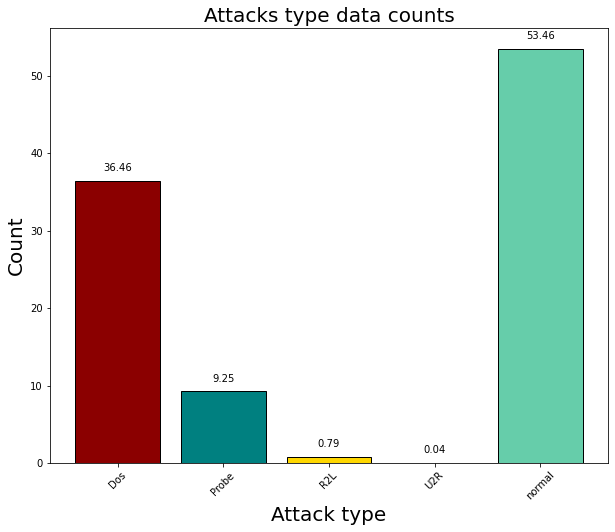

In [18]:
fig = plt.figure(figsize = (10,8))
r_ = [round(each, 2) for each in percent_data.values]
ax = fig.add_subplot(111)
ax.bar(percent_data.index, percent_data.values, color = ['darkred', 'teal', 'gold', 'lightseagreen', "mediumaquamarine"], edgecolor = 'black')
ax.set_xticklabels(percent_data.index, rotation = 45)
ax.set_xlabel("Attack type", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attacks type data counts", fontsize = 20)

for i in range(len(percent_data.values)):
    plt.annotate(str(r_[i]), xy=(percent_data.index[i],r_[i]+1), ha='center', va='bottom')

In [19]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,Dos


# Sample train data

In [20]:
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos


# Encoding attack_type to numerical for multi-label classification

In [21]:
def attack_encode(value):
    if value == 'normal':
        return 0;
    elif value == "Dos":
        return 1;
    elif value == 'Probe':
        return 2;
    elif value == 'R2L':
        return 3;
    else:
        return 4;

In [22]:
train_df['intrusion_code'] = train_df['attack_type'].apply(attack_encode)
train_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0.00,normal,20,normal,0
1,0.00,normal,15,normal,0
2,0.00,neptune,19,Dos,1
3,0.01,normal,21,normal,0
4,0.00,normal,21,normal,0
5,1.00,neptune,21,Dos,1
6,0.00,neptune,21,Dos,1
7,0.00,neptune,21,Dos,1
8,0.00,neptune,21,Dos,1
9,0.00,neptune,21,Dos,1


In [23]:
train_df[train_df['intrusion_code'] == 2].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
17,0.0,ipsweep,18,Probe,2
30,0.0,ipsweep,17,Probe,2
33,1.0,portsweep,20,Probe,2
56,0.0,nmap,17,Probe,2
62,1.0,satan,18,Probe,2


In [24]:
train_df[train_df['intrusion_code'] == 3].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
13,0.0,warezclient,15,R2L,3
48,0.0,warezclient,12,R2L,3
148,0.0,warezclient,11,R2L,3
190,0.0,warezclient,2,R2L,3
222,0.0,warezclient,12,R2L,3


In [25]:
train_df[train_df['intrusion_code'] == 4].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
3173,0.0,rootkit,1,U2R,4
5579,0.0,buffer_overflow,9,U2R,4
5831,0.0,buffer_overflow,12,U2R,4
8675,0.0,buffer_overflow,2,U2R,4
11448,0.0,rootkit,0,U2R,4


In [26]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [27]:
test_df['attack_type'] = test_df['class'].apply(encode_attack)
test_df.iloc[:20, -10:]

,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
1,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
2,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,normal
3,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,R2L
4,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,R2L
5,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,normal
6,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,normal
7,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,R2L
8,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,normal
9,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,R2L


In [28]:
test_df['intrusion_code'] = test_df['attack_type'].apply(attack_encode)
test_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,1.00,neptune,21,Dos,1
1,1.00,neptune,21,Dos,1
2,0.00,normal,21,normal,0
3,0.00,saint,15,R2L,3
4,0.71,mscan,11,R2L,3
5,0.00,normal,21,normal,0
6,0.04,normal,21,normal,0
7,0.02,guess_passwd,15,R2L,3
8,0.00,normal,21,normal,0
9,0.00,guess_passwd,7,R2L,3


In [29]:
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1


In [30]:
test_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,normal,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,R2L,3
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,R2L,3
5,0,tcp,http,SF,267,14515,0,0,0,0,...,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,normal,0
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,normal,0
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,R2L,3
8,0,tcp,http,SF,327,467,0,0,0,0,...,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,normal,0
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,R2L,3


# Dropping class and attack_type variables as it was encoded in "intrusion_code"

In [31]:
train_df = train_df.drop(columns = ['class','difficulty level', 'attack_type'])
test_df = test_df.drop(columns = ['class', 'difficulty level','attack_type'])

In [33]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [34]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,3
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,3


# Numerical Columns Correlations with respect to target column

In [35]:
train_df.corr()['intrusion_code'].sort_values(ascending = False)

intrusion_code                 1.000000
dst_host_diff_srv_rate         0.391328
count                          0.388358
dst_host_srv_serror_rate       0.384796
dst_host_serror_rate           0.382118
serror_rate                    0.381646
srv_serror_rate                0.378669
dst_host_same_src_port_rate    0.319096
dst_host_srv_rerror_rate       0.310227
srv_rerror_rate                0.309909
rerror_rate                    0.308668
dst_host_rerror_rate           0.293805
diff_srv_rate                  0.282314
dst_host_srv_diff_host_rate    0.239646
dst_host_count                 0.196102
duration                       0.129443
hot                            0.065085
wrong_fragment                 0.054795
is_guest_login                 0.030600
num_failed_logins              0.023120
src_bytes                      0.012981
srv_diff_host_rate             0.010456
dst_bytes                      0.008651
root_shell                     0.007758
num_shells                     0.005208


In [36]:
# Select only categorical variables
category_df = train_df.select_dtypes('object')

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the label column back in the dataframe
dummy_df['intrusion_code'] = train_df['intrusion_code']

dummy_df.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion_code
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['intrusion_code'].sort_values(ascending=False)

intrusion_code        1.000000
service_private       0.398863
flag_S0               0.373549
service_eco_i         0.338355
protocol_type_icmp    0.292874
                        ...   
protocol_type_udp    -0.155004
service_smtp         -0.189656
service_domain_u     -0.229571
service_http         -0.511499
flag_SF              -0.548643
Name: intrusion_code, Length: 85, dtype: float64

# Feature selection by dropping redudant feature

In [38]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion_code'],
      dtype='object')

In [39]:
train_df = train_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'])

test_df = test_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'
                                 ])

In [40]:
train_df.tail(10)

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
125963,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0
125964,0,tcp,private,S0,0,0,0,0,0,0,...,12,0.05,0.06,0.00,0.00,1.00,1.0,0.00,0.0,1
125965,0,tcp,smtp,SF,0,0,1,0,0,0,...,2,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.0,0
125966,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,1.00,1.0,0.00,0.0,1
125967,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.0,0.00,0.0,0
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.0,1
125969,8,udp,private,SF,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.0,0
125970,0,tcp,smtp,SF,0,0,1,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.0,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.0,1
125972,0,tcp,ftp_data,SF,0,0,1,0,0,0,...,77,0.30,0.03,0.30,0.00,0.00,0.0,0.00,0.0,0


In [41]:
test_df.head(10)

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
2,2,tcp,ftp_data,SF,0,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0
3,0,icmp,eco_i,SF,0,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,3
4,1,tcp,telnet,RSTO,0,0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,3
5,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0
6,0,tcp,smtp,SF,0,0,1,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0
7,0,tcp,telnet,SF,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,3
8,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0
9,0,tcp,ftp,SF,0,0,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,3


In [46]:
train_df.corr()['intrusion_code'].sort_values(ascending = False)

intrusion_code                 1.000000
dst_host_diff_srv_rate         0.391328
count                          0.388358
dst_host_srv_serror_rate       0.384796
dst_host_serror_rate           0.382118
serror_rate                    0.381646
srv_serror_rate                0.378669
dst_host_same_src_port_rate    0.319096
dst_host_srv_rerror_rate       0.310227
srv_rerror_rate                0.309909
rerror_rate                    0.308668
dst_host_rerror_rate           0.293805
diff_srv_rate                  0.282314
dst_host_srv_diff_host_rate    0.239646
dst_host_count                 0.196102
duration                       0.129443
hot                            0.065085
wrong_fragment                 0.054795
is_guest_login                 0.030600
srv_diff_host_rate             0.010456
root_shell                     0.007758
num_compromised               -0.009003
num_root                      -0.010020
num_file_creations            -0.014384
su_attempted                  -0.019483


In [42]:
train_df_new = pd.get_dummies(train_df)
test_df_new = pd.get_dummies(test_df)

In [43]:
print (train_df_new.shape)
print (test_df_new.shape)

(125973, 114)
(22544, 108)


In [44]:
set(train_df_new.columns).difference(set(test_df_new))

{'service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i'}

In [45]:
train_df_new

,duration,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Selecting top 30 highly correlated features with respect to target variable : intrusion_code

In [46]:
highly_correlated = train_df_new.corr().abs()['intrusion_code'].sort_values(ascending=False)
highly_correlated[:30]

intrusion_code                 1.000000
dst_host_srv_count             0.624241
logged_in                      0.576031
flag_SF                        0.548643
dst_host_same_srv_rate         0.525829
service_http                   0.511499
same_srv_rate                  0.510871
service_private                0.398863
dst_host_diff_srv_rate         0.391328
count                          0.388358
dst_host_srv_serror_rate       0.384796
dst_host_serror_rate           0.382118
serror_rate                    0.381646
srv_serror_rate                0.378669
flag_S0                        0.373549
service_eco_i                  0.338355
dst_host_same_src_port_rate    0.319096
dst_host_srv_rerror_rate       0.310227
srv_rerror_rate                0.309909
rerror_rate                    0.308668
dst_host_rerror_rate           0.293805
protocol_type_icmp             0.292874
diff_srv_rate                  0.282314
flag_RSTR                      0.255984
dst_host_srv_diff_host_rate    0.239646


In [47]:
train_df_new = train_df_new[list(highly_correlated[:30].index)]
test_df_new = train_df_new[list(highly_correlated[:30].index)]

# Generate HeatMap visualization on newly made correlated dateset

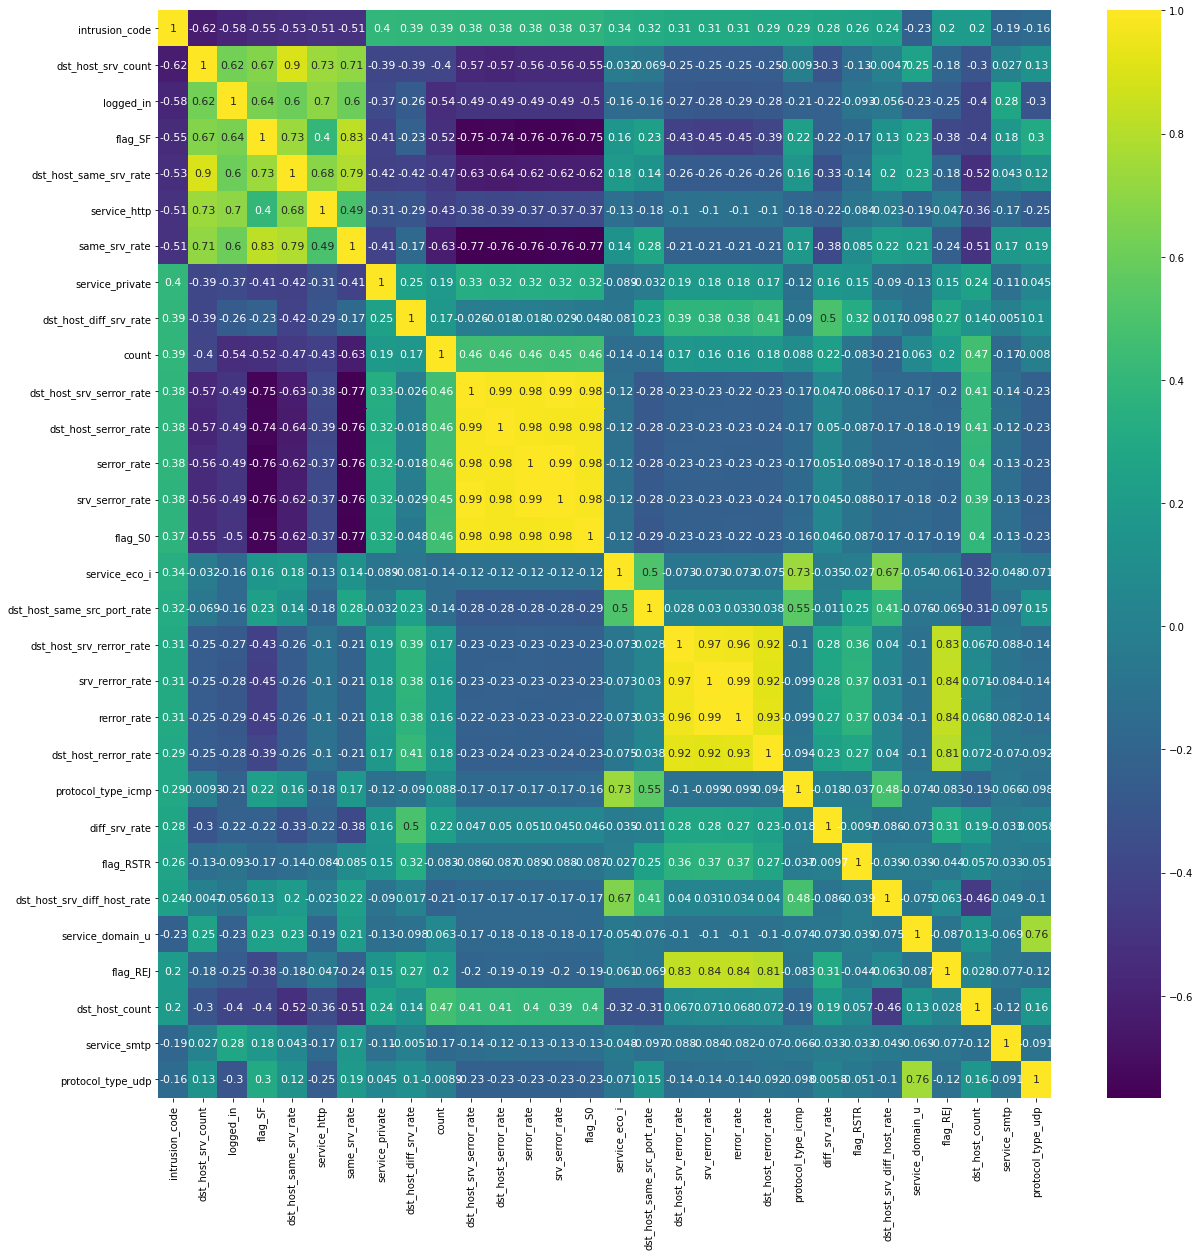

In [48]:
corr_df = train_df_new.corr()[train_df_new.corr().index]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_df, cmap='viridis', annot=True, annot_kws={"size": 11})
plt.show()

In [49]:
train_df_new.head(10)

,intrusion_code,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,...,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp
0,0,25,0,1,0.17,0,1.00,0,0.03,2,...,0.05,0,0.00,0,0.00,0,0,150,0,0
1,0,1,0,1,0.00,0,0.08,0,0.60,13,...,0.00,0,0.15,0,0.00,0,0,255,0,1
2,1,26,0,0,0.10,0,0.05,1,0.05,123,...,0.00,0,0.07,0,0.00,0,0,255,0,0
3,0,255,1,1,1.00,1,1.00,0,0.00,5,...,0.00,0,0.00,0,0.04,0,0,30,0,0
4,0,255,1,1,1.00,1,1.00,0,0.00,30,...,0.00,0,0.00,0,0.00,0,0,255,0,0
5,1,19,0,0,0.07,0,0.16,1,0.07,121,...,1.00,0,0.06,0,0.00,0,1,255,0,0
6,1,9,0,0,0.04,0,0.05,1,0.05,166,...,0.00,0,0.06,0,0.00,0,0,255,0,0
7,1,15,0,0,0.06,0,0.14,1,0.07,117,...,0.00,0,0.06,0,0.00,0,0,255,0,0
8,1,23,0,0,0.09,0,0.09,0,0.05,270,...,0.00,0,0.05,0,0.00,0,0,255,0,0
9,1,13,0,0,0.05,0,0.06,1,0.06,133,...,0.00,0,0.06,0,0.00,0,0,255,0,0


In [50]:
test_df_new.head(10)

,intrusion_code,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,...,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp
0,0,25,0,1,0.17,0,1.00,0,0.03,2,...,0.05,0,0.00,0,0.00,0,0,150,0,0
1,0,1,0,1,0.00,0,0.08,0,0.60,13,...,0.00,0,0.15,0,0.00,0,0,255,0,1
2,1,26,0,0,0.10,0,0.05,1,0.05,123,...,0.00,0,0.07,0,0.00,0,0,255,0,0
3,0,255,1,1,1.00,1,1.00,0,0.00,5,...,0.00,0,0.00,0,0.04,0,0,30,0,0
4,0,255,1,1,1.00,1,1.00,0,0.00,30,...,0.00,0,0.00,0,0.00,0,0,255,0,0
5,1,19,0,0,0.07,0,0.16,1,0.07,121,...,1.00,0,0.06,0,0.00,0,1,255,0,0
6,1,9,0,0,0.04,0,0.05,1,0.05,166,...,0.00,0,0.06,0,0.00,0,0,255,0,0
7,1,15,0,0,0.06,0,0.14,1,0.07,117,...,0.00,0,0.06,0,0.00,0,0,255,0,0
8,1,23,0,0,0.09,0,0.09,0,0.05,270,...,0.00,0,0.05,0,0.00,0,0,255,0,0
9,1,13,0,0,0.05,0,0.06,1,0.06,133,...,0.00,0,0.06,0,0.00,0,0,255,0,0


# Preparing X (feature set variables) and y(target variable)

In [51]:
X = train_df_new.drop(columns = 'intrusion_code')
y = train_df_new['intrusion_code']

In [52]:
X.shape

(125973, 29)

# Standardizing data using StandardScaler

In [53]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Splitting data into train and test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)

# (i) DecisionTree Classification

In [55]:
# Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [56]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions and Evaluation of Decision Tree

Accuracy of DT: 0.9935383491831647
Precision of DT: 0.9935819519735907
Recall of DT: 0.9935383491831647
F1-score of DT: 0.9935595251625668
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     33700
           1       1.00      1.00      1.00     22873
           2       0.99      0.99      0.99      5896
           3       0.85      0.86      0.86       490
           4       0.07      0.07      0.07        28

    accuracy                           0.99     62987
   macro avg       0.78      0.78      0.78     62987
weighted avg       0.99      0.99      0.99     62987



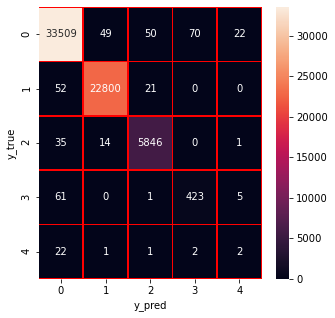

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
#print('FPR of DT: '+(str()))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [58]:
import numpy as np
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_true,y_predict)
tp = np.diag(cm)
print('True Positive Per Label: ' + str(tp))

fp = np.sum(cm, axis=0) - tp
print('False Positive Per Label: ' + str(fp))

fn = np.sum(cm, axis=1) - tp
print('False Negative Per Label: ' + str(fn))


benign_tn = np.sum(cm) - (tp[0]+ fp[0] + fn[0])
dos_tn = np.sum(cm) - (tp[1]+ fp[1] + fn[1])
probe_tn = np.sum(cm) - (tp[2]+ fp[2] + fn[2])
r2l_tn = np.sum(cm) - (tp[3]+ fp[3] + fn[3])
u2r_tn = np.sum(cm) - (tp[4]+ fp[4] + fn[4])
print('True Negative Per Label: ' + str([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))


benign_fpr = fp[0]/ (fp[0] + benign_tn)
dos_fpr = fp[1]/ (fp[1] + dos_tn)
probe_fpr = fp[2]/ (fp[2] + probe_tn)
r2l_fpr = fp[3]/ (fp[3] + r2l_tn)
u2r_fpr = fp[4]/ (fp[4] + u2r_tn)
print('False Positive Rate Per Label: '+ str([benign_fpr, dos_fpr, probe_fpr, r2l_fpr, u2r_fpr]))

#compute overall False positive rate
overall_false_positive_rate = np.sum(fp)/ (np.sum(fp) +np.sum([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate) + '\n')

True Positive Per Label: [33509 22800  5846   423     2]
False Positive Per Label: [170  64  73  72  28]
False Negative Per Label: [191  73  50  67  26]
True Negative Per Label: [29117, 40050, 57018, 62425, 62931]
False Positive Rate Per Label: [0.005804623211663878, 0.00159545295906666, 0.001278660384298751, 0.0011520552986543353, 0.0004447338744262139]
Overall False Positive Rate = 0.001615412704208805



In [59]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     33700
           1       1.00      1.00      1.00     22873
           2       0.99      0.99      0.99      5896
           3       0.86      0.87      0.86       490
           4       0.08      0.07      0.08        28

    accuracy                           0.99     62987
   macro avg       0.78      0.78      0.78     62987
weighted avg       0.99      0.99      0.99     62987



# Evaluating model using testing data

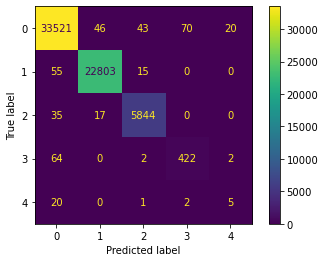

In [66]:
metrics.classification_report(y_test,predictions)
metrics.plot_confusion_matrix(dtree, X_test, y_test)

# Changing criterion, max_depth, min_samples_split of DecisionTree

In [60]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=10, min_samples_split = 2)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     33700
           1       0.99      1.00      0.99     22873
           2       0.99      0.97      0.98      5896
           3       0.88      0.50      0.64       490
           4       0.40      0.07      0.12        28

    accuracy                           0.99     62987
   macro avg       0.85      0.71      0.75     62987
weighted avg       0.99      0.99      0.99     62987

[[33492   146    29    31     2]
 [   51 22813     9     0     0]
 [  104    59  5733     0     0]
 [  243     0     0   246     1]
 [   23     1     0     2     2]]
Accuracy of prediction: 0.894


In [61]:
X_t = test_df_new.drop(columns = 'intrusion_code')
y_t = test_df_new['intrusion_code']

In [62]:
X_t.shape

(125973, 29)

In [63]:
y_t.shape

(125973,)

In [64]:
scaler = StandardScaler().fit(X_t)
X_t = scaler.transform(X_t)

In [65]:
train_df_new.shape

(125973, 30)

# Decision Tree Predictions and Classification report on new testing data

In [66]:
pred = dtree.predict(X_t)
print(classification_report(y_t,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     67343
           1       0.99      1.00      0.99     45927
           2       0.99      0.98      0.99     11656
           3       0.92      0.51      0.66       995
           4       0.62      0.10      0.17        52

    accuracy                           0.99    125973
   macro avg       0.90      0.72      0.76    125973
weighted avg       0.99      0.99      0.99    125973



In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_t,pred)
tp = np.diag(cm)
print('True Positive Per Label: ' + str(tp))

fp = np.sum(cm, axis=0) - tp
print('False Positive Per Label: ' + str(fp))

fn = np.sum(cm, axis=1) - tp
print('False Negative Per Label: ' + str(fn))


benign_tn = np.sum(cm) - (tp[0]+ fp[0] + fn[0])
dos_tn = np.sum(cm) - (tp[1]+ fp[1] + fn[1])
probe_tn = np.sum(cm) - (tp[2]+ fp[2] + fn[2])
r2l_tn = np.sum(cm) - (tp[3]+ fp[3] + fn[3])
u2r_tn = np.sum(cm) - (tp[4]+ fp[4] + fn[4])
print('True Negative Per Label: ' + str([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))


benign_fpr = fp[0]/ (fp[0] + benign_tn)
dos_fpr = fp[1]/ (fp[1] + dos_tn)
probe_fpr = fp[2]/ (fp[2] + probe_tn)
r2l_fpr = fp[3]/ (fp[3] + r2l_tn)
u2r_fpr = fp[4]/ (fp[4] + u2r_tn)
print('False Positive Rate Per Label: '+ str([benign_fpr, dos_fpr, probe_fpr, r2l_fpr, u2r_fpr]))

#compute overall False positive rate
overall_false_positive_rate = np.sum(fp)/ (np.sum(fp) +np.sum([benign_tn, dos_tn, probe_tn, r2l_tn, u2r_tn]))
print('Overall False Positive Rate = ' + str(overall_false_positive_rate) + '\n')

True Positive Per Label: [66987 45821 11376   508     5]
False Positive Per Label: [803 364  63  43   3]
False Negative Per Label: [356 106 280 487  47]
True Negative Per Label: [57827, 79682, 114254, 124935, 125918]
False Positive Rate Per Label: [0.013696060037523453, 0.004547385253479249, 0.0005510991366113526, 0.00034406055465761973, 2.382446136863589e-05]
Overall False Positive Rate = 0.0025322886650313956



In [76]:
conf_mat=confusion_matrix(y_t,pred)
print(conf_mat)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[66989   265    46    41     2]
 [   86 45825    16     0     0]
 [  184    97 11375     0     0]
 [  486     0     0   508     1]
 [   44     1     0     2     5]]
Accuracy of prediction: 0.894


# Confusion matrix plot for new testing data

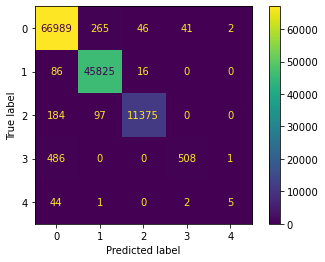

In [77]:
metrics.plot_confusion_matrix(dtree, X_t, y_t)